## Evaluating instances of proxy discrimination in insurance
### Data Science and AI Risk Management Industry Group

In [29]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score

In [2]:
data = pd.read_csv("../data/telematics_syn-032021.csv")
data.head()

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity10,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.71,25,...,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.42,20,...,58.0,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,2.0,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.000000


In [3]:
data = pd.get_dummies(data, drop_first=True)

In [4]:
data.head()

,Duration,Insured.age,Car.age,Credit.score,Annual.miles.drive,Years.noclaims,Territory,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,...,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim,Insured.sex_Male,Marital_Single,Car.use_Commute,Car.use_Farmer,Car.use_Private,Region_Urban
0,366,45,-1,609.0,6213.71,25,70,0.849315,8864.376247,0.148070,...,0.0,0.0,1,5100.171753,1,0,1,0,0,1
1,182,44,3,575.0,12427.42,20,26,0.465753,8092.308208,0.147686,...,101.0,40.0,1,883.554840,0,0,1,0,0,1
2,184,48,6,847.0,12427.42,14,84,0.520548,3225.832512,0.153735,...,0.0,0.0,0,0.000000,0,0,1,0,0,1
3,183,71,6,842.0,6213.71,43,30,0.065753,253.024528,0.106702,...,0.0,0.0,0,0.000000,1,0,0,0,1,1
4,183,84,10,856.0,6213.71,65,70,0.441096,4374.379634,0.123807,...,4.0,2.0,0,0.000000,1,0,0,0,1,1


In [5]:
data.describe()

,Duration,Insured.age,Car.age,Credit.score,Annual.miles.drive,Years.noclaims,Territory,Annual.pct.driven,Total.miles.driven,Pct.drive.mon,...,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim,Insured.sex_Male,Marital_Single,Car.use_Commute,Car.use_Farmer,Car.use_Private,Region_Urban
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,314.204060,51.378950,5.639720,800.888870,9124.122908,28.839960,56.531390,0.502294,4833.575303,0.139365,...,246.713120,198.753690,0.04494,137.602253,0.539430,0.300700,0.498150,0.014130,0.461290,0.781410
std,79.746222,15.467075,4.062135,83.382316,3826.144730,16.123717,24.036518,0.299189,4545.943016,0.042807,...,8977.569994,8585.177049,0.21813,1264.320056,0.498445,0.458565,0.499999,0.118027,0.498502,0.413292
min,27.000000,16.000000,-2.000000,422.000000,0.000000,0.000000,11.000000,0.002740,0.095298,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,200.000000,39.000000,2.000000,766.000000,6213.710000,15.000000,35.000000,0.249315,1529.897500,0.120894,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,365.000000,51.000000,5.000000,825.000000,7456.452000,29.000000,62.000000,0.490411,3468.287765,0.137909,...,2.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366.000000,63.000000,8.000000,856.000000,12427.420000,41.000000,78.000000,0.753425,6779.876842,0.155203,...,27.000000,9.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,366.000000,103.000000,20.000000,900.000000,56731.172300,79.000000,91.000000,1.000000,47282.603936,0.998172,...,841176.000000,841144.000000,3.00000,104074.886700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
y = data["Insured.sex_Male"]
X = data.drop(["Insured.sex_Male"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [7]:
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [8]:
y_pred = model.predict(X_test)

In [9]:
y_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=uint8)

In [10]:
cm = confusion_matrix(y_test, y_pred)

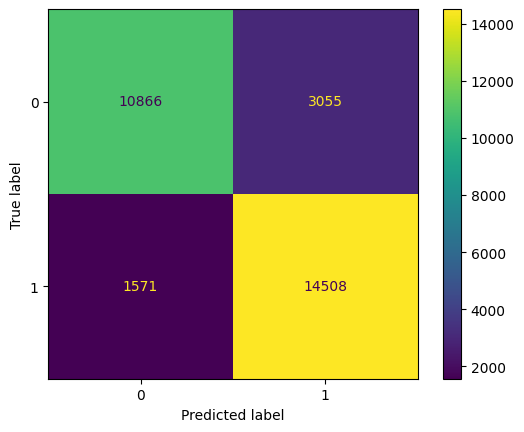

In [12]:
ConfusionMatrixDisplay(cm).plot()

In [43]:
print(str((accuracy_score(y_test, y_pred) * 100)))

84.58


In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82     13921
           1       0.83      0.90      0.86     16079

    accuracy                           0.85     30000
   macro avg       0.85      0.84      0.84     30000
weighted avg       0.85      0.85      0.84     30000



In [44]:
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names)

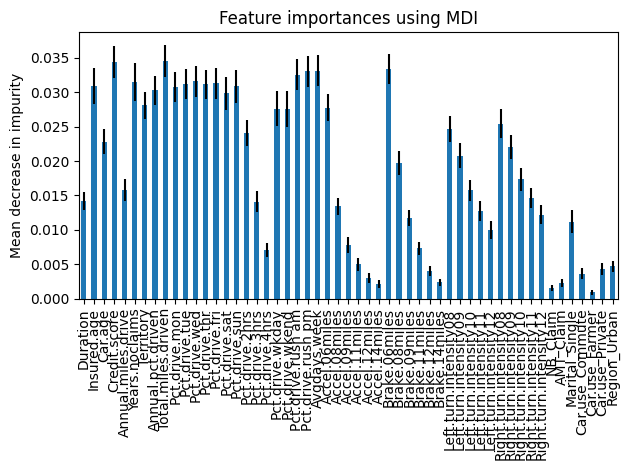

In [45]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()